In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import os
import math


In [2]:
cmap = plt.cm.get_cmap('tab20')
colors = [cmap(i) for i in np.linspace(0, 1.5, 12)]

C:\Users\rwint\AppData\Local\Temp\ipykernel_13352\132574125.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab20')


In [3]:
file = r'D:\UNI\MILJOETEK\4. semester\Calculations\Data.xlsx'
sheet = 'Births net savings'

save_dir = r'D:\UNI\MILJOETEK\4. semester\Calculations\Hospital_CDU_MDU'
# Create the directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)
data = pd.read_excel(file, sheet_name=sheet)

header = ['Kolding MDU', 'Kolding CDU' ,'OUH MDU','OUH CDU ', 'Svendborg MDU','Svendborg CDU', 
          'Esbjerg MDU','Esbjerg CDU', 'Aabenraa MDU','Aabeenraa CDU', 'Vejle MDU','Vejle CDU']

header2 = ['Kolding: 5 MDU vs 1 CDU', 'OUH: 6 MDU vs 1 CDU', 'Svendborg: 2 MDU vs 1 CDU', 
           'Esbjerg: 3 MDU vs 1 CDU', 'Aabenraa: 3 MDU vs 1 CDU', 'Vejle: 3 MDU vs 1 CDU']

# Select the range A51:M51
cost_pr_ton = data.iloc[50:51, 1:13]
cost_pr_ton


,2021,2022,2023,Unnamed: 4,Hospital,Municipalities,2021.1,2022.1,2023.1,4 L cylinder,50 L cylinder,50/50
50,1312.512359,1106.74851,800.264245,550.625649,1004.236637,2234.683632,1654.071226,2462.530078,-88023.63523,-20045.755203,916.612397,1308.009831


In [4]:

col = data.columns
col = col[1:13]
lst = np.zeros(12)

for i in range(len(col)):
    lst[i] = cost_pr_ton[col[i]]

    


C:\Users\rwint\AppData\Local\Temp\ipykernel_13352\2211828220.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  lst[i] = cost_pr_ton[col[i]]


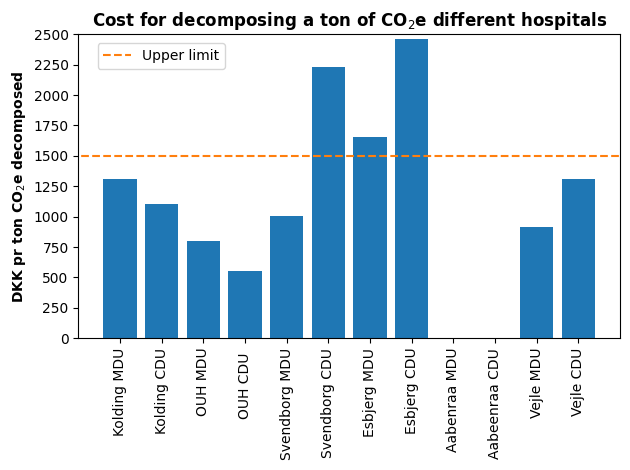

In [5]:
fig, ax = plt.subplots()
ax.bar(header, lst, color=colors[0]) 
ax.hlines(1500, -2, 14, color=colors[1], linestyle='dashed')
plt.ylim(0, 2500)
plt.xlim(-1, 12)
plt.yticks(np.arange(0, 2501, step=250))
ax.hlines(0,-1,14, color='k',linewidth=.5)

#ax.set_yscale('symlog')
plt.xticks(rotation=90)
plt.ylabel('DKK pr ton CO$_2$e decomposed', weight='bold')
plt.title('Cost for decomposing a ton of CO$_2$e different hospitals', weight='bold')

# Add legend for the dashed line
ax.legend(['Upper limit'], loc='upper right', bbox_to_anchor=(0.27, 0.97), borderaxespad=0,)
plt.tight_layout()
plt.savefig(os.path.join(save_dir, 'comparison_cost_pr_ton.jpg'), bbox_inches='tight')
plt.show()

In [6]:
data = pd.read_excel(file, sheet_name=sheet)


data_col = data.columns
data_col = data_col[28:]
data = data[data_col]




# Filter columns containing 'Use emissions' or 'impact' in their names
columns_to_drop = [col for col in data.columns if 'Use emissions' in col or 'impact' in col]

# Drop filtered columns
data = data.drop(columns=columns_to_drop)
data = data.drop(columns='Unnamed: 77')




col = data.columns
col1 = col[0]
col2 = col[1:]


plot_legend = ['MDU',
                   'CDU',
               'No DU']


counter = 0


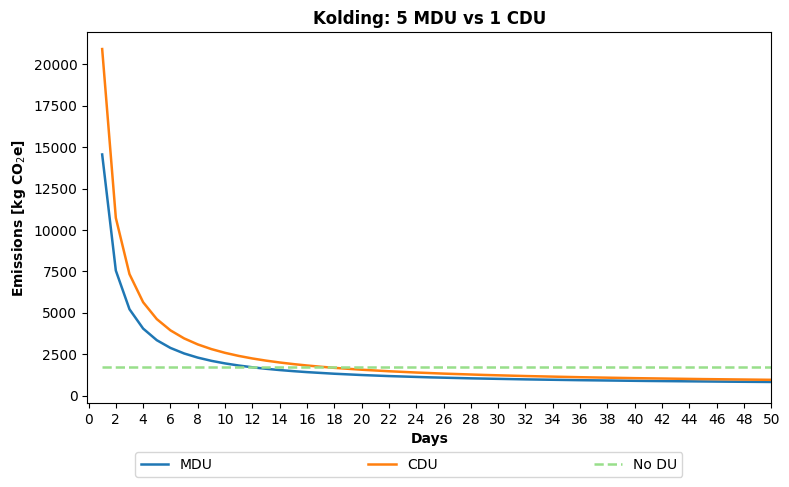

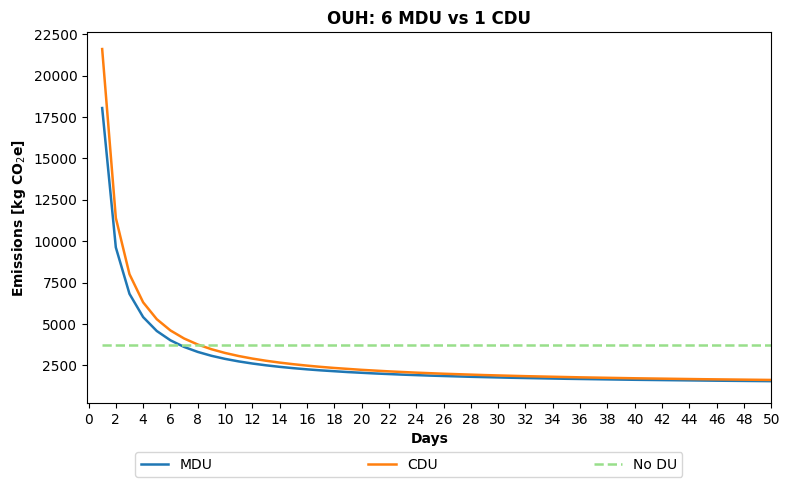

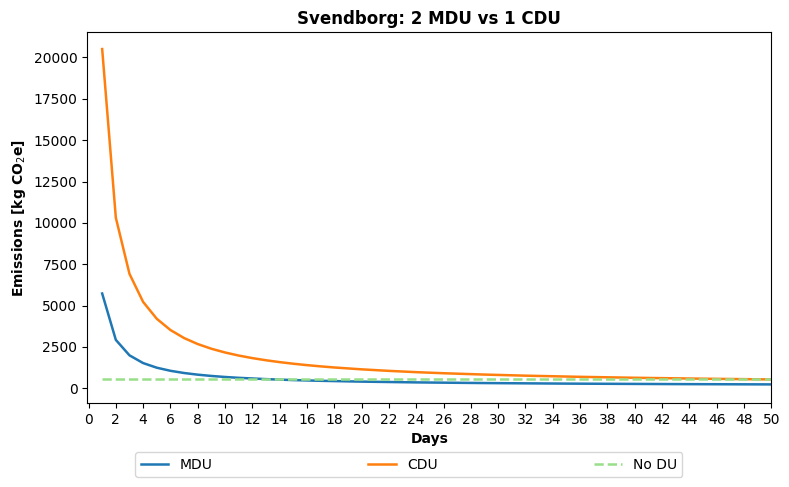

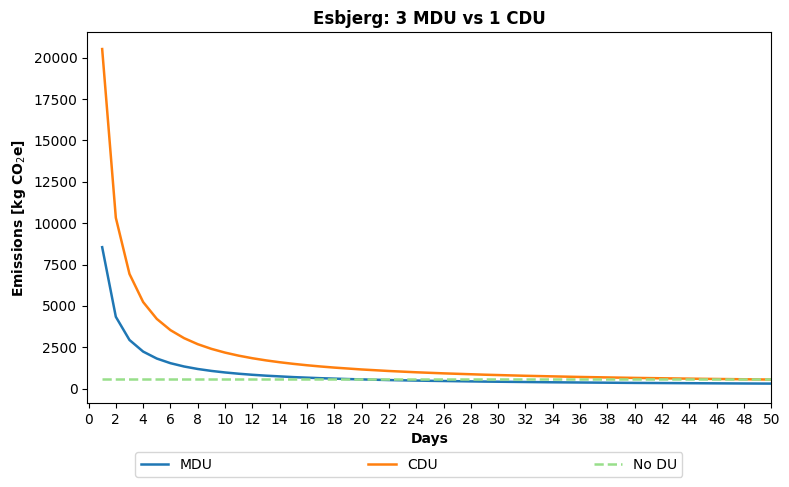

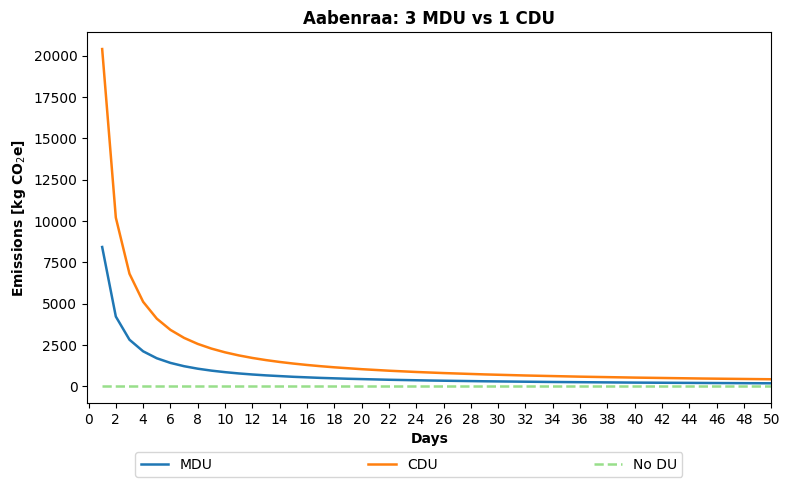

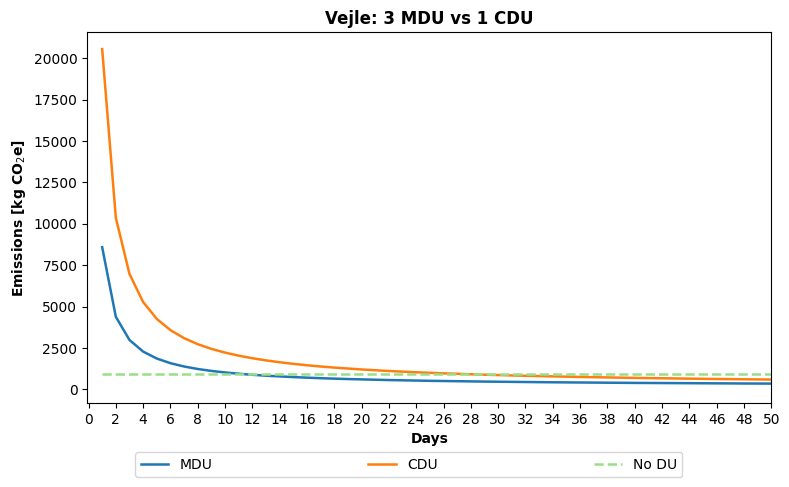

In [7]:
for i in range(0, int(len(col2)), 4):
    width = 1.8
    plt.subplots(figsize=(8, 5))
    #plt.rc('xtick', labelsize=16)
    plt.plot(data['Days'], data[col2[i]], color=colors[0], linewidth=width)
    plt.plot(data['Days'], data[col2[i+2]], color=colors[1], linewidth=width)
    plt.plot(data['Days'], data[col2[i+1]], color=colors[2], linestyle='dashed', linewidth=width)

    plt.ylabel('Emissions [kg CO$_2$e]',weight='bold')
    plt.xlabel('Days',weight='bold')
    plt.legend(plot_legend,bbox_to_anchor=(0.07, -0.2, 0.8, 0.2), loc="lower left",
            mode="expand", borderaxespad=0, ncol=3)
    plt.xlim(-0.1, 50)
    plt.title(f'{header2[counter]}',weight='bold')

    # Set x-axis ticks to integers with step of 1
    plt.xticks(np.arange(0, 51, step=2))
    

    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, 'Break_even_{}_cost_sens.jpg'.format(counter)), bbox_inches='tight')
    plt.show()
    counter += 1

counter = 0

In [8]:
file = r'D:\UNI\MILJOETEK\4. semester\Calculations\Data.xlsx'
sheet = 'Births net savings'
data = pd.read_excel(file, sheet_name=sheet)
Annnual_cost = data.iloc[49:50, 1:13]
cost_col = Annnual_cost.columns
Annual_lst = np.zeros(12)
for i in range(len(cost_col)):
    Annual_lst[i] = Annnual_cost[cost_col[i]]
    

C:\Users\rwint\AppData\Local\Temp\ipykernel_13352\691088214.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Annual_lst[i] = Annnual_cost[cost_col[i]]


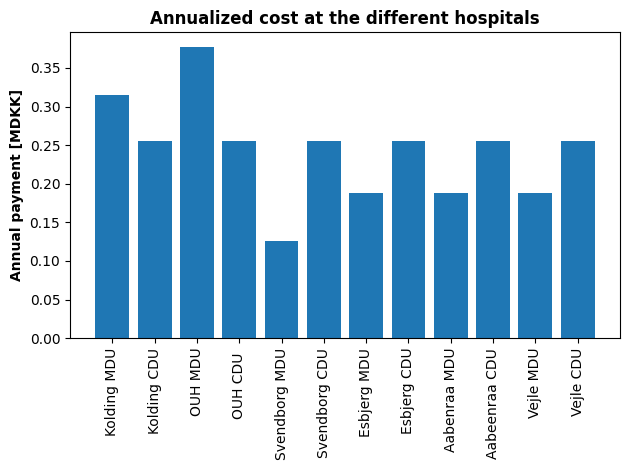

In [9]:
fig, ax = plt.subplots()
ax.bar(header, Annual_lst/1000000, color=colors[0]) 

#plt.ylim(-250000, 100000)
plt.xlim(-1, 12)
#plt.yticks(np.arange(0, 3901, step=200))


#ax.set_yscale('symlog')
plt.xticks(rotation=90)
plt.ylabel('Annual payment [MDKK]', weight='bold')
plt.title('Annualized cost at the different hospitals', weight='bold')
# plt.gca().yaxis.set_major_formatter('mtick.PercentFormatter(1,decimals=0)')
# Add legend for the dashed line
#ax.legend(['Upper limit'], loc='upper right', bbox_to_anchor=(0.27, 0.97), borderaxespad=0,)
plt.tight_layout()
plt.savefig(os.path.join(save_dir, 'comparison_annual_cost.jpg'), bbox_inches='tight')
plt.show()